# Testing the model without a magnetic field

## setup

In [1]:
include("../src/ising.jl")
using CairoMakie

In [2]:
J=1.0
grid_size=20

20

## Temperature between 1K and 8K

In [3]:
energies, magnetisations, temps = temp_sweep(grid_size=grid_size,T_Start=1.0,T_End=8.0,T_Steps=250,J=J,N_Thermalize=50_000_000,N_Sample=1_000_000)

(([-23999.5392, -23999.418876, -21507.870624, -23998.453308, -23998.503036, -22386.732748, -23997.075012, -23995.451116, -22372.85572, -23993.918896  …  -3314.587408, -3300.114444, -3307.645248, -3273.419628, -3313.629288, -3264.565808, -3251.678348, -3221.039532, -3260.531588, -3209.862944], [5.759778871296e8, 5.75972113021488e8, 4.62589165532416e8, 5.75925777769392e8, 5.75928163691568e8, 5.011659228076e8, 5.75859641539248e8, 5.75781725510032e8, 5.00544891700864e8, 5.757082075936e8  …  1.1018395967296e7, 1.0924525024464e7, 1.096541159968e7, 1.0744967645584e7, 1.1007323786464e7, 1.0686951652928e7, 1.0603502764976e7, 1.0400360719728e7, 1.0657951789328e7, 1.033214839616e7]), ([-0.9999904, -0.9999878932499999, 0.10849391350000001, 0.9999677772499999, 0.9999688132499999, 0.1999773012499999, -0.9999390627499997, -0.9999051822499996, -0.19988435499999993, 0.9998729567499994  …  -0.009376843250000011, 0.009837146249999987, 0.004655358499999995, 0.00403341974999998, -0.003160629249999996, -0.0

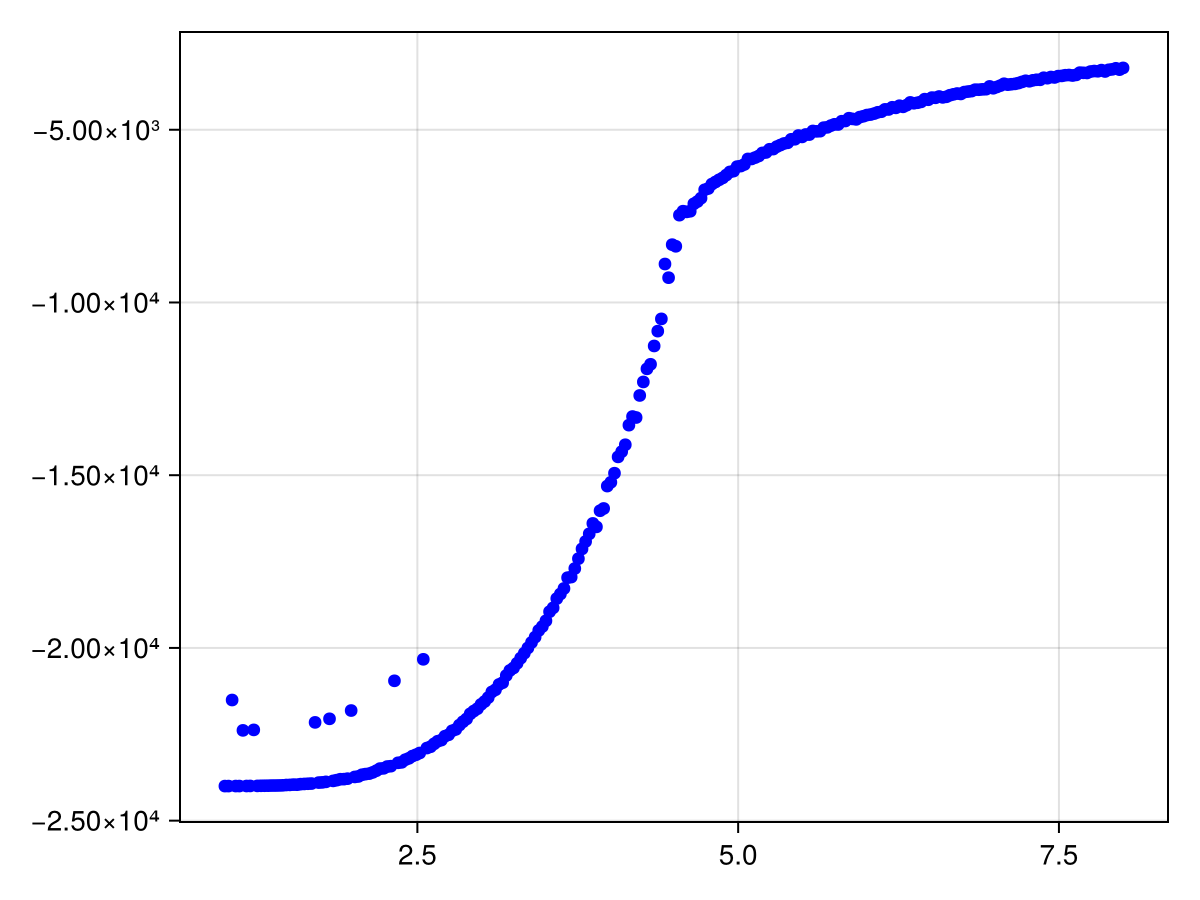

In [4]:
scatter(temps, energies[1], color=:blue, label="Energy")

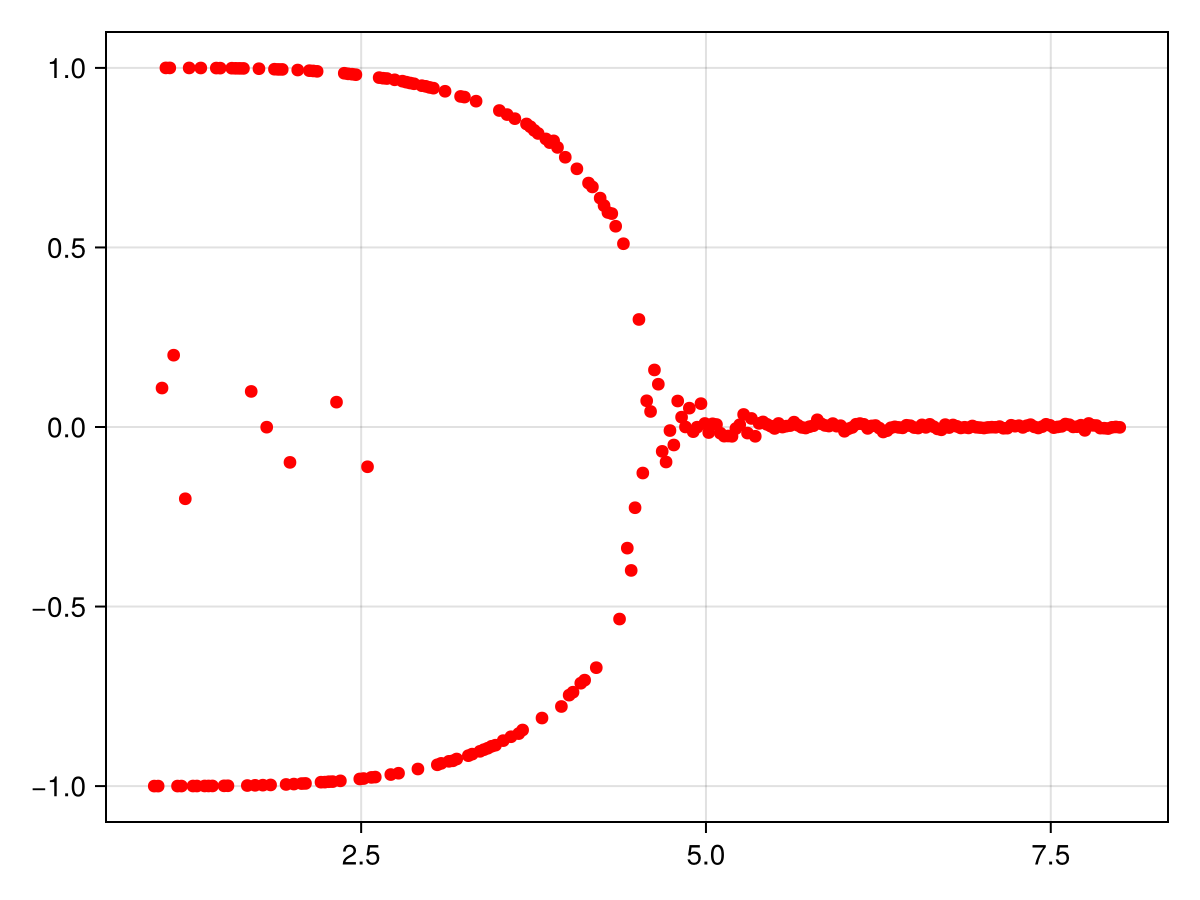

In [5]:
scatter(temps, magnetisations[1], color=:red, label="Magnetisation")

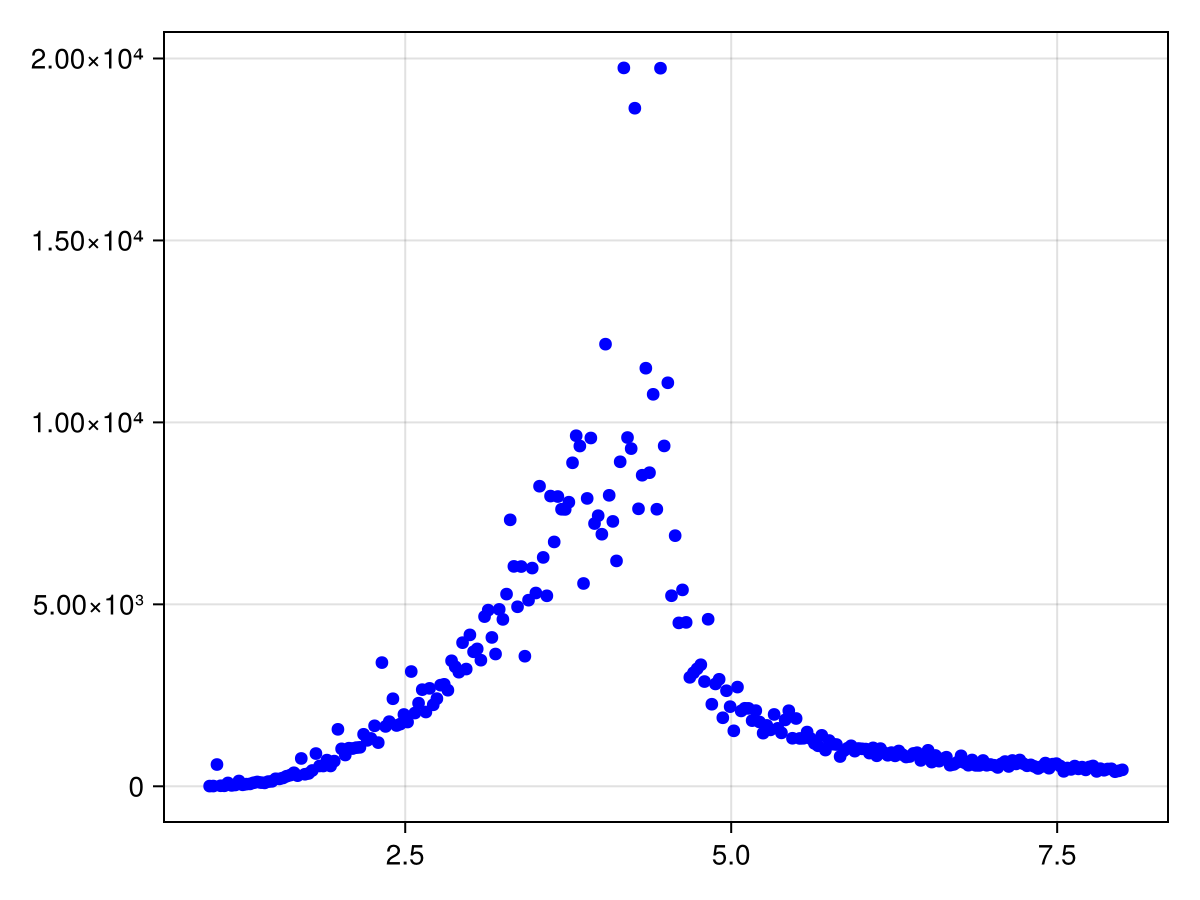

In [6]:
scatter(temps, (energies[2] .- energies[1] .^2)./temps.^2 , color=:blue, label="Heat Capacity")

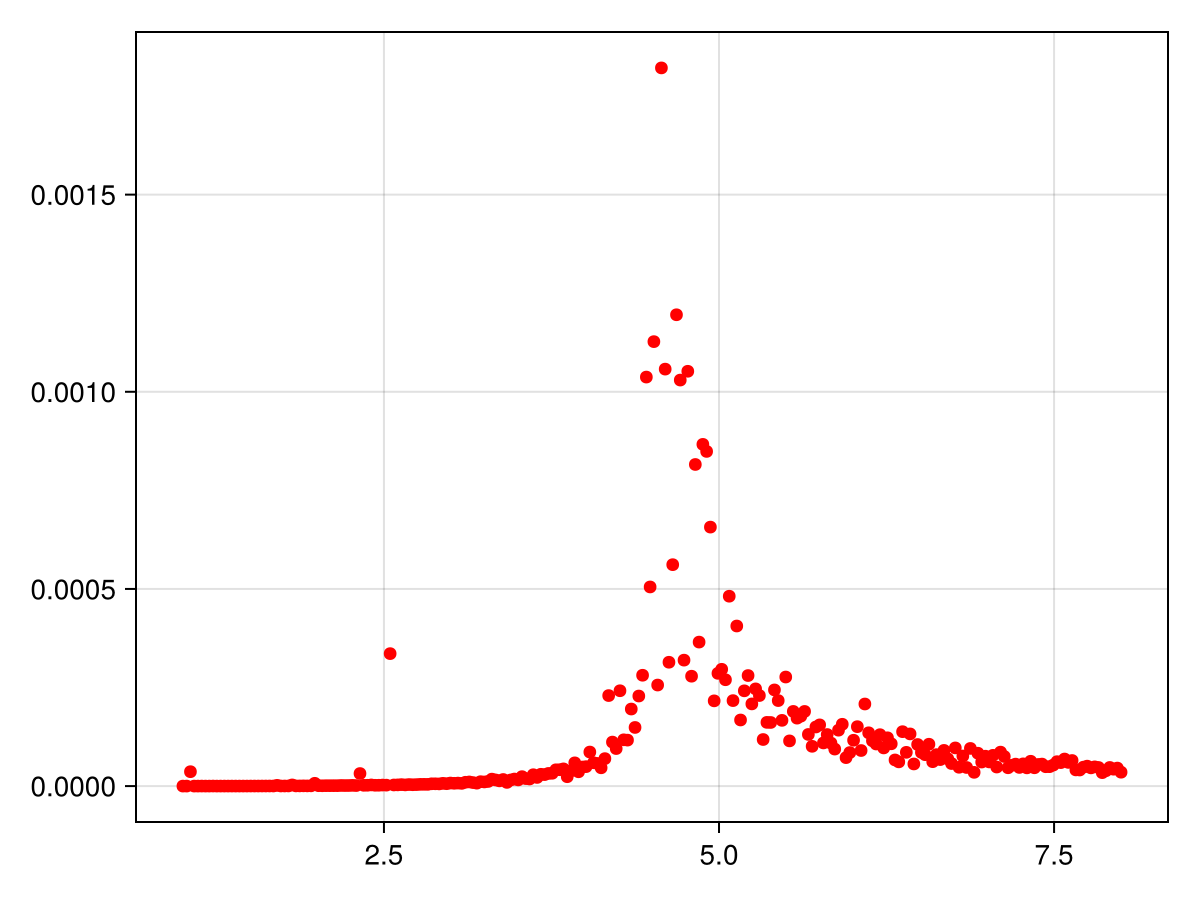

In [7]:
scatter(temps, (magnetisations[2] .- magnetisations[1] .^2)./temps, color=:red, label="Magnetic Susceptibility")